```{contents}
```

## Gradient Boosting Regressor

**Gradient Boosting Regressor (GBR)** is an ensemble learning method used for **regression tasks**. It builds a strong predictive model by **sequentially combining weak learners (typically decision trees)** in a way that each new learner corrects the errors of the previous ensemble.

Here’s a detailed explanation:

---

### 1. **Core Idea**

* Start with a simple model (like the mean of targets).
* Fit a sequence of weak learners to the **residuals** (errors) of the current model.
* Each new learner tries to predict the negative gradient of the loss function (hence "gradient boosting").
* Combine the learners using a learning rate to form the final model.

---

### 2. **Mathematical Formulation**

#### Step 1: Initialize model

For regression, typically using **Mean Squared Error (MSE)** as loss:

$$
F_0(x) = \arg\min_\gamma \sum_{i=1}^n (y_i - \gamma)^2
$$

* Solution: $F_0(x) = \frac{1}{n}\sum_{i=1}^n y_i$ (mean of targets)

---

#### Step 2: Compute pseudo-residuals

For iteration $m = 1,2,...,M$:

$$
r_{im} = - \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)}
$$

* For MSE: $r_{im} = y_i - F_{m-1}(x_i)$
* Residual = error of the current model.

---

#### Step 3: Fit a weak learner

* Train a weak learner $h_m(x)$ (usually a decision tree) to **predict $r_{im}$**.

---

#### Step 4: Line search for optimal multiplier

* Compute best step size $\gamma_m$:

$$
\gamma_m = \arg\min_\gamma \sum_{i=1}^n L\Big(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)\Big)
$$

* For MSE: $\gamma_m$ is the **mean of the residuals in each leaf**.

---

#### Step 5: Update model

$$
F_m(x) = F_{m-1}(x) + \nu \cdot \gamma_m h_m(x)
$$

* $\nu$ = learning rate (shrinkage factor, usually 0.01–0.2)

---

#### Step 6: Final prediction

After $M$ iterations:

$$
\hat{y} = F_M(x) = F_0(x) + \sum_{m=1}^{M} \nu \gamma_m h_m(x)
$$

---

### 3. **Hyperparameters**

* `n_estimators` → number of trees $M$
* `learning_rate` → shrinkage factor $\nu$
* `max_depth` → depth of each tree
* `min_samples_split` → minimum samples per split
* `subsample` → fraction of data for stochastic gradient boosting

---

### 4. **Intuition**

1. Start with a simple guess (mean).
2. Look at errors → fit a tree to correct them.
3. Add corrections gradually (learning rate) → build strong model.
4. Each tree focuses more on the “hard” parts that previous trees got wrong.

---

### 5. **Advantages**

* Handles non-linear relationships well.
* Can model complex interactions.
* Reduces bias through sequential corrections.

---

### 6. **Limitations**

* Prone to overfitting if too many trees or too deep.
* Slower than simpler models (like linear regression).
* Sensitive to outliers if not handled properly.

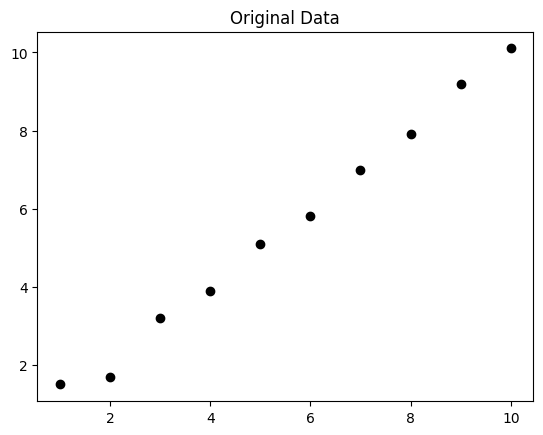

Initial prediction F0: 5.54

Iteration 1
Residuals: [-4.04 -3.84 -2.34 -1.64 -0.44  0.26  1.46  2.36  3.66  4.56]
Updated predictions Fm: [3.57       3.57       4.80333333 4.80333333 4.80333333 6.22
 6.22       6.22       7.595      7.595     ]

Iteration 2
Residuals: [-2.07       -1.87       -1.60333333 -0.90333333  0.29666667 -0.42
  0.78        1.68        1.605       2.505     ]
Updated predictions Fm: [2.64611111 2.64611111 3.87944444 4.63222222 4.63222222 6.04888889
 6.8975     6.8975     8.2725     8.8475    ]

Iteration 3
Residuals: [-1.14611111 -0.94611111 -0.67944444 -0.73222222  0.46777778 -0.24888889
  0.1025      1.0025      0.9275      1.2525    ]
Updated predictions Fm: [2.12305556 2.12305556 3.52652778 4.27930556 4.68578704 6.1024537
 6.95106481 7.42791667 8.80291667 9.37791667]


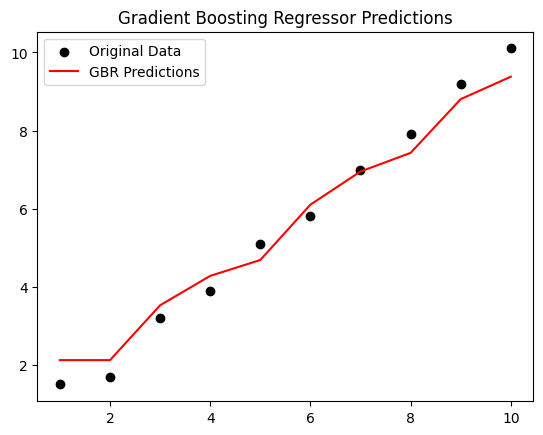

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Step 1: Create a small dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
y = np.array([1.5, 1.7, 3.2, 3.9, 5.1, 5.8, 7.0, 7.9, 9.2, 10.1])

plt.scatter(X, y, color='black')
plt.title("Original Data")
plt.show()

# Step 2: Initialize model with mean
F0 = np.mean(y)
print("Initial prediction F0:", F0)

# Step 3: Parameters
n_estimators = 3       # Number of weak learners
learning_rate = 0.5    # Shrinkage
residuals_list = []    # To store residuals

Fm = np.full_like(y, F0, dtype=float)  # Current model predictions

# Step 4: Gradient Boosting iterations
for m in range(n_estimators):
    # Compute residuals
    residuals = y - Fm
    residuals_list.append(residuals)
    print(f"\nIteration {m+1}")
    print("Residuals:", residuals)
    
    # Fit a weak learner (Decision Tree of depth=2)
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residuals)
    
    # Predict residuals
    pred = tree.predict(X)
    
    # Update model
    Fm += learning_rate * pred
    print("Updated predictions Fm:", Fm)

# Step 5: Plot predictions
plt.scatter(X, y, color='black', label='Original Data')
plt.plot(X, Fm, color='red', label='GBR Predictions')
plt.title("Gradient Boosting Regressor Predictions")
plt.legend()
plt.show()
